In [1]:
!pip install opencv-python numpy matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.1.2-cp313-cp313-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached contourpy-1.3.0-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp313-cp313-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached numpy-2.1.2-cp313-cp313-win_amd64.whl (12.6 MB)


In [4]:
import cv2
import os

def detect_and_crop_faces(input_folder, output_folder):
    # Load OpenCV's Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over all subfolders in the input folder
    for person_folder in os.listdir(input_folder):
        person_input_path = os.path.join(input_folder, person_folder)

        # Check if it's a directory (skip files)
        if os.path.isdir(person_input_path):
            person_output_path = os.path.join(output_folder, person_folder)

            if not os.path.exists(person_output_path):
                os.makedirs(person_output_path)

            # Process all images in each person's folder
            for filename in os.listdir(person_input_path):
                image_path = os.path.join(person_input_path, filename)
                img = cv2.imread(image_path)
                
                # Check if image is read successfully
                if img is not None:
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    
                    # Detect faces in the image
                    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                    
                    # Crop and save each detected face
                    for (x, y, w, h) in faces:
                        face_img = img[y:y+h, x:x+w]
                        face_filename = os.path.join(person_output_path, filename)
                        cv2.imwrite(face_filename, face_img)

# Example usage for detecting and cropping faces from multiple folders
input_folder = r'C:\Users\anand\Desktop\Attendance System\dataset'
output_folder = r'C:\Users\anand\Desktop\Attendance System\cropped_faces'

detect_and_crop_faces(input_folder, output_folder)

In [8]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, size=(224, 224)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Iterate over each subfolder (person's folder) in the input folder
    for person_folder in os.listdir(input_folder):
        person_input_path = os.path.join(input_folder, person_folder)
        person_output_path = os.path.join(output_folder, person_folder)

        # Check if it's a directory (skip files)
        if os.path.isdir(person_input_path):
            if not os.path.exists(person_output_path):
                os.makedirs(person_output_path)

            # Process each image in the person's folder
            for filename in os.listdir(person_input_path):
                image_path = os.path.join(person_input_path, filename)

                # Try to open the image, skip if it's not an image file
                try:
                    img = Image.open(image_path)
                    img_resized = img.resize(size)
                    img_resized.save(os.path.join(person_output_path, filename))
                except (IOError, OSError):
                    print(f"Skipping file: {image_path}, not a valid image")

# Example usage to resize images in multiple subfolders
input_folder = r'C:\Users\anand\Desktop\Attendance System\cropped_faces'
output_folder = r'C:\Users\anand\Desktop\Attendance System\resized_faces'

resize_images(input_folder, output_folder)

In [9]:
from PIL import Image, ImageEnhance, ImageOps
import random
import os

def augment_image(image_path, output_folder):
    img = Image.open(image_path)
    
    # Flip image horizontally
    img_flipped = ImageOps.mirror(img)
    
    # Rotate image randomly between -30 and 30 degrees
    angle = random.randint(-30, 30)
    img_rotated = img.rotate(angle)
    
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    img_contrast = enhancer.enhance(1.5)
    
    # Save augmented images in the output folder
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    img_flipped.save(os.path.join(output_folder, 'flipped_' + os.path.basename(image_path)))
    img_rotated.save(os.path.join(output_folder, 'rotated_' + os.path.basename(image_path)))
    img_contrast.save(os.path.join(output_folder, 'contrast_' + os.path.basename(image_path)))

# Folder where all persons' folders are located
input_root_folder = './resized_faces'
output_root_folder = './augmented_faces'

# Loop through each person's folder
for person_folder in os.listdir(input_root_folder):
    input_folder = os.path.join(input_root_folder, person_folder)
    output_folder = os.path.join(output_root_folder, person_folder)
    
    # Make sure it's a directory
    if os.path.isdir(input_folder):
        for filename in os.listdir(input_folder):
            image_path = os.path.join(input_folder, filename)
            augment_image(image_path, output_folder)

In [11]:
!conda install scikit-learn -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



C:\Users\anand\miniconda3\Lib\site-packages\conda\base\context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(


In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split  # This is correct and should work.

def split_data(input_folder, train_folder, val_folder, test_folder, test_size=0.1, val_size=0.1):
    if not os.path.exists(train_folder):
        os.makedirs(train_folder)
    if not os.path.exists(val_folder):
        os.makedirs(val_folder)
    if not os.path.exists(test_folder):
        os.makedirs(test_folder)
    
    images = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]
    
    # Split data into train, validation, and test sets
    train_images, test_images = train_test_split(images, test_size=test_size)
    train_images, val_images = train_test_split(train_images, test_size=val_size)
    
    # Move files to train folder
    for img in train_images:
        shutil.move(os.path.join(input_folder, img), os.path.join(train_folder, img))
    
    # Move files to validation folder
    for img in val_images:
        shutil.move(os.path.join(input_folder, img), os.path.join(val_folder, img))
    
    # Move files to test folder
    for img in test_images:
        shutil.move(os.path.join(input_folder, img), os.path.join(test_folder, img))

# Root folder containing augmented faces for all individuals
input_root_folder = r'C:\Users\anand\Desktop\Attendance System\augmented_faces'
train_root_folder = r'C:\Users\anand\Desktop\Attendance System\dataset_split\train'
val_root_folder = r'C:\Users\anand\Desktop\Attendance System\dataset_split\val'
test_root_folder = r'C:\Users\anand\Desktop\Attendance System\dataset_split\test'

# Loop through each person's folder
for person_folder in os.listdir(input_root_folder):
    input_folder = os.path.join(input_root_folder, person_folder)
    
    # Create corresponding train, val, and test folders for each person
    train_folder = os.path.join(train_root_folder, person_folder)
    val_folder = os.path.join(val_root_folder, person_folder)
    test_folder = os.path.join(test_root_folder, person_folder)
    
    # Make sure it's a directory before proceeding
    if os.path.isdir(input_folder):
        split_data(input_folder, train_folder, val_folder, test_folder)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = r'C:\Users\anand\Desktop\Attendance System\dataset_split\train'
val_dir = r'C:\Users\anand\Desktop\Attendance System\dataset_split\val'

# Image data generator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # for face recognition with multiple persons
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 88 images belonging to 7 classes.
Found 14 images belonging to 7 classes.


In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

C:\Users\anand\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\anand\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.1871 - loss: 3.1013 - val_accuracy: 0.1429 - val_loss: 2.4751
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1428 - loss: 2.0895 - val_accuracy: 0.2857 - val_loss: 1.8576
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.3032 - loss: 1.7969 - val_accuracy: 0.2143 - val_loss: 1.8920
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2554 - loss: 1.6902 - val_accuracy: 0.3571 - val_loss: 1.8462
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4751 - loss: 1.4883 - val_accuracy: 0.2143 - val_loss: 1.8080
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3877 - loss: 1.5145 - val_accuracy: 0.5714 - val_loss: 1.5669
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7101 - loss: 1.3521 - val_accuracy: 0.5000 - val_loss: 1.4672
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6415 - loss: 1.1640 - val_accuracy: 0.3571 - val_loss: 1.6383
Epoch 9/

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a single image and preprocess
img_path = r'C:\Users\anand\Desktop\Attendance System\dataset_split\test\Sushmita\contrast_Sushmita1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class: [2]


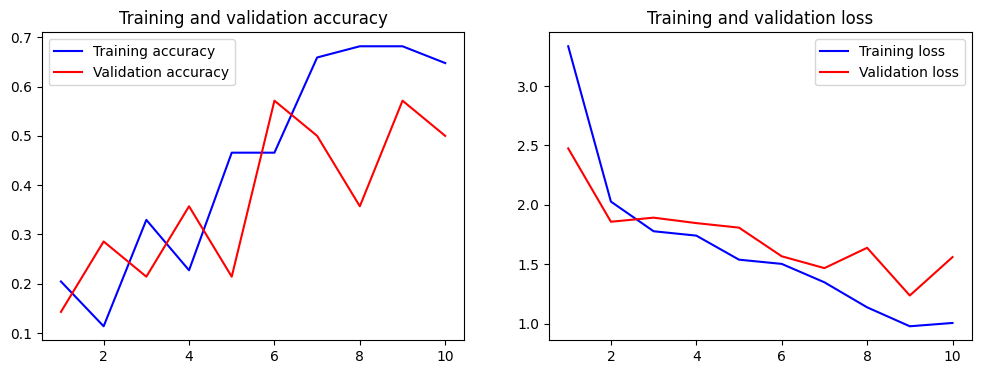

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()